In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
sns.set_theme()
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
LMPD = pd.read_csv('C:\\Users\\14322\\Desktop\\LMPD_STOPS_DATA.csv', low_memory=False)

In [3]:
LMPD.columns

Index(['TYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY RESULTS',
       'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE',
       'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION',
       'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
       'NUMBER OF PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH'],
      dtype='object')

In [4]:
LMPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431091 entries, 0 to 431090
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   TYPE_OF_STOP             430778 non-null  object
 1   CITATION_CONTROL_NUMBER  408519 non-null  object
 2   ACTIVITY RESULTS         431091 non-null  object
 3   OFFICER_GENDER           430803 non-null  object
 4   OFFICER_RACE             430804 non-null  object
 5   OFFICER_AGE_RANGE        426085 non-null  object
 6   ACTIVITY_DATE            431091 non-null  object
 7   ACTIVITY_TIME            431035 non-null  object
 8   ACTIVITY_LOCATION        430889 non-null  object
 9   ACTIVITY_DIVISION        430432 non-null  object
 10  ACTIVITY_BEAT            430385 non-null  object
 11  DRIVER_GENDER            431049 non-null  object
 12  DRIVER_RACE              430906 non-null  object
 13  DRIVER_AGE_RANGE         431051 non-null  object
 14  NUMBER OF PASSENGERS

In [5]:
LMPD.shape

(431091, 17)

In [6]:
LMPD['TYPE_OF_STOP'].value_counts()

TRAFFIC VIOLATION               428114
COMPLAINT/CRIMINAL VIOLATION      1808
COMPLIANCE STOP (KVE ONLY)         856
Name: TYPE_OF_STOP, dtype: int64

In [7]:
LMPD.isnull().sum()

TYPE_OF_STOP                  313
CITATION_CONTROL_NUMBER     22572
ACTIVITY RESULTS                0
OFFICER_GENDER                288
OFFICER_RACE                  287
OFFICER_AGE_RANGE            5006
ACTIVITY_DATE                   0
ACTIVITY_TIME                  56
ACTIVITY_LOCATION             202
ACTIVITY_DIVISION             659
ACTIVITY_BEAT                 706
DRIVER_GENDER                  42
DRIVER_RACE                   185
DRIVER_AGE_RANGE               40
NUMBER OF PASSENGERS            0
WAS_VEHCILE_SEARCHED            3
REASON_FOR_SEARCH          283764
dtype: int64

In [8]:
LMPD = LMPD[['TYPE_OF_STOP','ACTIVITY RESULTS',
       'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE',
       'ACTIVITY_TIME','ACTIVITY_DIVISION','ACTIVITY_DATE',
       'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
       'NUMBER OF PASSENGERS', 'WAS_VEHCILE_SEARCHED']] #removing ['CITATION_CONTROL_NUMBER','ACTIVITY_LOCATION',
# 'REASON_FOR_SEARCH']

In [9]:
LMPD.isnull().sum()

TYPE_OF_STOP             313
ACTIVITY RESULTS           0
OFFICER_GENDER           288
OFFICER_RACE             287
OFFICER_AGE_RANGE       5006
ACTIVITY_TIME             56
ACTIVITY_DIVISION        659
ACTIVITY_DATE              0
ACTIVITY_BEAT            706
DRIVER_GENDER             42
DRIVER_RACE              185
DRIVER_AGE_RANGE          40
NUMBER OF PASSENGERS       0
WAS_VEHCILE_SEARCHED       3
dtype: int64

In [10]:
#Since I am interested in exploring traffic violation stops only, 
#I will filter out non-traffic stops,#e.g compliance stops

In [11]:
LMPDTS = LMPD[LMPD['TYPE_OF_STOP'] == 'TRAFFIC VIOLATION']
LMPDTS.shape

(428114, 14)

In [12]:
LMPDTS.isnull().sum()

TYPE_OF_STOP               0
ACTIVITY RESULTS           0
OFFICER_GENDER           264
OFFICER_RACE             263
OFFICER_AGE_RANGE       4914
ACTIVITY_TIME             49
ACTIVITY_DIVISION        641
ACTIVITY_DATE              0
ACTIVITY_BEAT            686
DRIVER_GENDER             34
DRIVER_RACE              180
DRIVER_AGE_RANGE          35
NUMBER OF PASSENGERS       0
WAS_VEHCILE_SEARCHED       0
dtype: int64

In [13]:
LMPDTS = LMPDTS.dropna(how='any')
LMPDTS.shape

(422259, 14)

In [14]:
LMPDTS.isnull().sum()

TYPE_OF_STOP            0
ACTIVITY RESULTS        0
OFFICER_GENDER          0
OFFICER_RACE            0
OFFICER_AGE_RANGE       0
ACTIVITY_TIME           0
ACTIVITY_DIVISION       0
ACTIVITY_DATE           0
ACTIVITY_BEAT           0
DRIVER_GENDER           0
DRIVER_RACE             0
DRIVER_AGE_RANGE        0
NUMBER OF PASSENGERS    0
WAS_VEHCILE_SEARCHED    0
dtype: int64

In [15]:
LMPDTS.index = pd.to_datetime(LMPDTS['ACTIVITY_DATE'])

In [16]:
LMPDTS.head()

,TYPE_OF_STOP,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_TIME,ACTIVITY_DIVISION,ACTIVITY_DATE,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED
ACTIVITY_DATE,,,,,,,,,,,,,,
2009-01-01,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,40 - 50,2:15:00,,1/1/2009,,M,BLACK,20 - 25,0,NO
2009-01-01,TRAFFIC VIOLATION,CITATION ISSUED,M,BLACK,50 - 60,17:21:00,5TH DIVISION,1/1/2009,BEAT 5,F,WHITE,31 - 40,2,NO
2009-01-01,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,OVER 60,2:13:00,1ST DIVISION,1/1/2009,BEAT 4,M,WHITE,26 - 30,1,NO
2009-01-01,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,OVER 60,8:25:00,6TH DIVISION,1/1/2009,BEAT 1,F,WHITE,51 - 60,0,NO
2009-01-01,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,40 - 50,5:32:00,3RD DIVISION,1/1/2009,BEAT 1,M,BLACK,26 - 30,1,NO


In [17]:
LMPDTS = LMPDTS.drop(index='2025-09-27') #data entry error?. we are not in 2025 yet

In [18]:
date_df = LMPDTS[['TYPE_OF_STOP']].groupby(['ACTIVITY_DATE']).size().to_frame('traffic stop counts')
date_df.head(10)

,traffic stop counts
ACTIVITY_DATE,
2009-01-01,89
2009-01-02,198
2009-01-03,187
2009-01-04,81
2009-01-05,227
2009-01-06,102
2009-01-07,176
2009-01-08,209
2009-01-09,150


In [19]:
date_df.columns

Index(['traffic stop counts'], dtype='object')

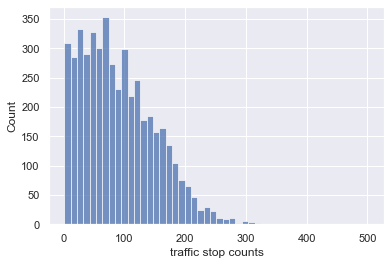

In [20]:
sns.histplot(x='traffic stop counts' , data=date_df);

In [21]:
#because of this right skewed distribution, better to see all three:median, mean and mode.
print('mean is:', date_df.mean()[0])
print('median is:', date_df.median()[0])
print('mode is:', date_df['traffic stop counts'].mode()[0])

mean is: 89.88037462750107
median is: 79.0
mode is: 74


In [22]:
highest = date_df[date_df['traffic stop counts'] == 502] #memorial day?
highest

,traffic stop counts
ACTIVITY_DATE,
2011-05-31,502


In [23]:
#  lowest = date_df[date_df['traffic stop counts'] == 1] # about 38 days have seen only 1 ticket being given
#  lowest.shape

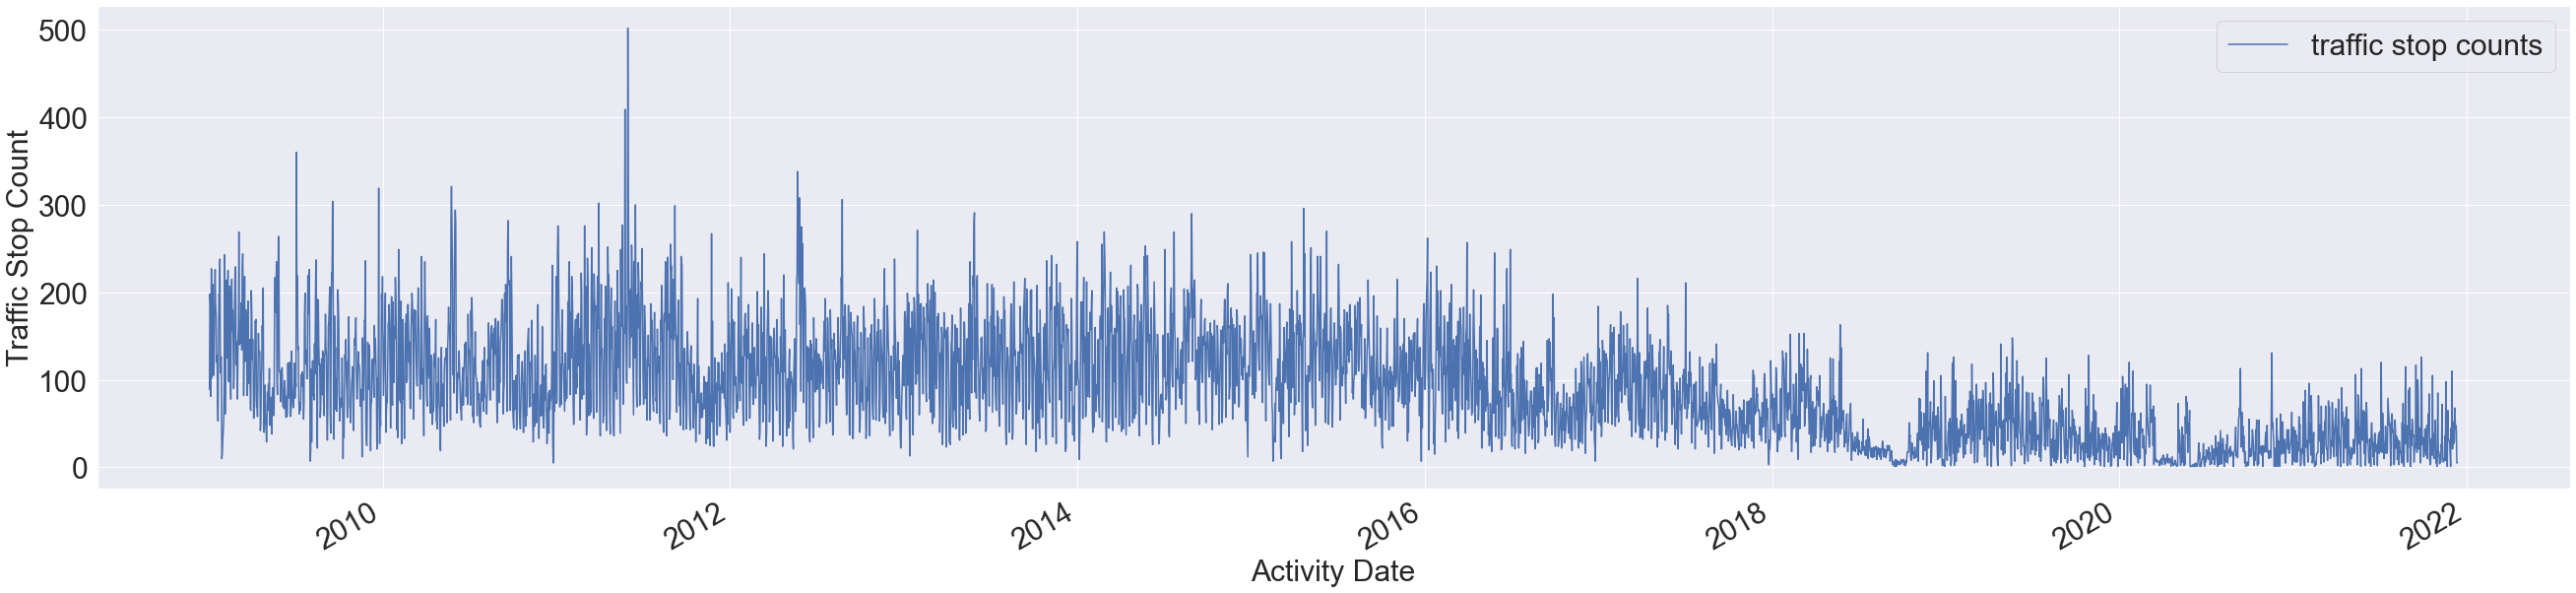

In [24]:
date_df.plot(figsize=(45,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Activity Date', fontsize=30)
plt.ylabel('Traffic Stop Count', fontsize=30)
plt.legend(loc='best', fontsize=30)
plt.show()

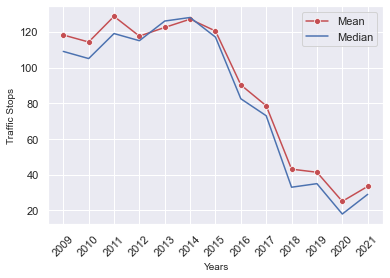

In [25]:
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
mn = {}
mian = {}
tssum = {}

for y in years:
    ALLmean = date_df[y].mean()
    ALLmedian = date_df[y].median()
    ALLtssum = date_df[y].sum()
    
    mn[y] = ALLmean
    mian[y] = ALLmedian 
    tssum[y] = ALLtssum
    
ALLmedian = pd.DataFrame(mian).T
ALLmean = pd.DataFrame(mn).T
ALLtssum = pd.DataFrame(tssum).T

mn = sns.lineplot(data=ALLmean, palette = ['r'],legend =False,markers=True)
mn = sns.lineplot(data=ALLmedian,legend=False)

mn.set_xlabel("Years", fontsize = 10)
mn.set_ylabel("Traffic Stops", fontsize = 10);
plt.legend(loc='upper right', labels=['Mean', 'Median'])
plt.xticks(rotation=45);

In [26]:
#LMPDTS.columns

In [27]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
LMPDTS['DRIVER_RACE'].value_counts()

WHITE                         288593
BLACK                         111167
HISPANIC                       16920
ASIAN                           4273
MIDDLE EASTERN DESCENT           508
ASIAN/PACIFIC ISLANDER           327
AMERICAN INDIAN                  276
INDIAN/INDIA/BURMESE             179
ALASKAN NATIVE                     7
UNKNOWN                            6
MIDDLE EASTERN                     1
INDIAN/INDIA/BURMESE               1
Name: DRIVER_RACE, dtype: int64

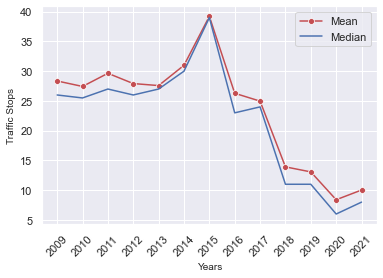

In [28]:
driver_race_B = LMPDTS[LMPDTS['DRIVER_RACE'] == 'BLACK' ]

blk = driver_race_B[['TYPE_OF_STOP']].groupby(['ACTIVITY_DATE']).size().to_frame('Black traffic stop counts')

years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
mn = {}
mian = {}

for y in years:
    BLKmean = blk[y].mean()
    BLKmedian = blk[y].median()
    
    mn[y] = BLKmean
    mian[y] = BLKmedian 
    
bmedian = pd.DataFrame(mian).T
bmean = pd.DataFrame(mn).T

mn = sns.lineplot(data=bmean, palette = ['r'],legend =False,markers=True)
mn = sns.lineplot(data=bmedian,legend=False)

mn.set_xlabel("Years", fontsize = 10)
mn.set_ylabel("Traffic Stops", fontsize = 10);
plt.legend(loc='upper right', labels=['Mean', 'Median'])
plt.xticks(rotation=45);
#driver_race_B.head()

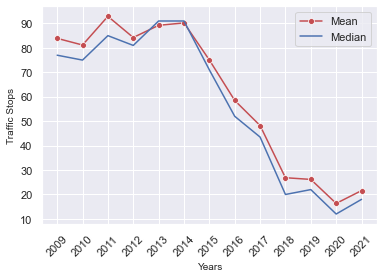

In [29]:
driver_race_W = LMPDTS[LMPDTS['DRIVER_RACE'] == 'WHITE' ]

wht = driver_race_W[['TYPE_OF_STOP']].groupby(['ACTIVITY_DATE']).size().to_frame('White traffic stop counts')

years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
mn = {}
mian = {}

for y in years:
    WHTmean = wht[y].mean()
    WHTmedian = wht[y].median()
    
    mn[y] = WHTmean
    mian[y] = WHTmedian 
    
wmedian = pd.DataFrame(mian).T
wmean = pd.DataFrame(mn).T

mn = sns.lineplot(data=wmean, palette = ['r'],legend =False,markers=True)
mn = sns.lineplot(data=wmedian,legend=False)

mn.set_xlabel("Years", fontsize = 10)
mn.set_ylabel("Traffic Stops", fontsize = 10);
plt.legend(loc='upper right', labels=['Mean', 'Median'])
plt.xticks(rotation=45);

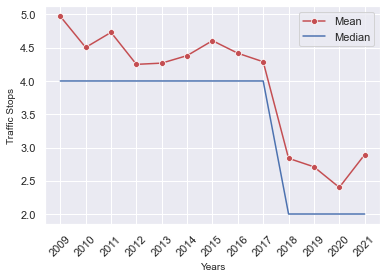

In [30]:
driver_race_H = LMPDTS[LMPDTS['DRIVER_RACE'] == 'HISPANIC' ]

hisp = driver_race_H[['TYPE_OF_STOP']].groupby(['ACTIVITY_DATE']).size().to_frame('hispanic traffic stop counts')

years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
mn = {}
mian = {}

for y in years:
    HISPmean = hisp[y].mean()
    HISPmedian = hisp[y].median()
    
    mn[y] = HISPmean
    mian[y] = HISPmedian 
    
hmedian = pd.DataFrame(mian).T
hmean = pd.DataFrame(mn).T

mn = sns.lineplot(data=hmean, palette = ['r'],legend =False,markers=True)
mn = sns.lineplot(data=hmedian,legend=False)

mn.set_xlabel("Years", fontsize = 10)
mn.set_ylabel("Traffic Stops", fontsize = 10);
plt.legend(loc='upper right', labels=['Mean', 'Median'])
plt.xticks(rotation=45);

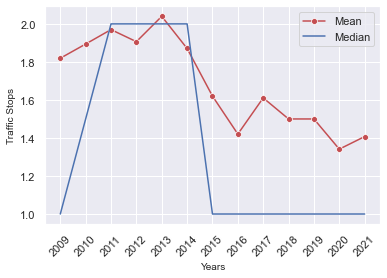

In [31]:
driver_race_A = LMPDTS[LMPDTS['DRIVER_RACE'] == 'ASIAN' ]

asi = driver_race_A[['TYPE_OF_STOP']].groupby(['ACTIVITY_DATE']).size().to_frame('asian traffic stop counts')

years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
mn = {}
mian = {}

for y in years:
    ASIPmean = asi[y].mean()
    ASIPmedian = asi[y].median()
    
    mn[y] = ASIPmean
    mian[y] = ASIPmedian 
    
amedian = pd.DataFrame(mian).T
amean = pd.DataFrame(mn).T

mn = sns.lineplot(data=amean, palette = ['r'],legend =False,markers=True)
mn = sns.lineplot(data=amedian,legend=False)

mn.set_xlabel("Years", fontsize = 10)
mn.set_ylabel("Traffic Stops", fontsize = 10);
plt.legend( loc='upper right', labels=['Mean', 'Median'])
plt.xticks(rotation=45);

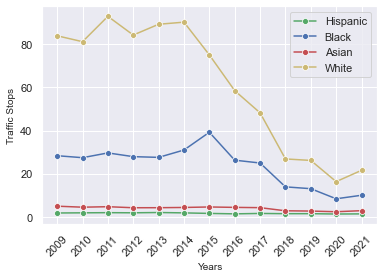

In [32]:
races = sns.lineplot(data=amean, palette = ['g'],legend =False,markers=True)
races = sns.lineplot(data=bmean, palette = ['b'],legend =False,markers=True)
races = sns.lineplot(data=hmean, palette = ['r'],legend =False,markers=True)
races = sns.lineplot(data=wmean, palette = ['y'],legend =False,markers=True)

races.set_xlabel("Years", fontsize = 10)
races.set_ylabel("Traffic Stops", fontsize = 10);
plt.legend( loc='upper right', labels=['Hispanic', 'Black','Asian','White'])
plt.xticks(rotation=45);

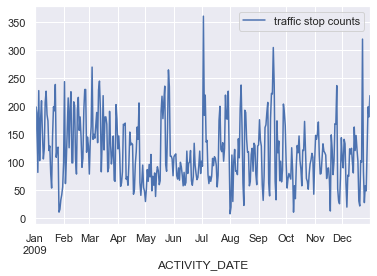

In [33]:
traffic_2009 = date_df['2009']
traffic_2009.plot()
plt.show()

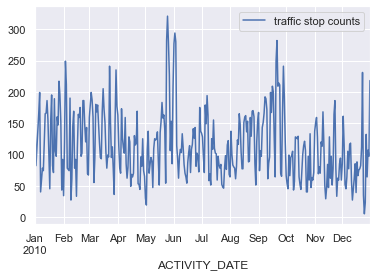

In [34]:
traffic_2010 = date_df['2010']
traffic_2010.plot()
plt.show()

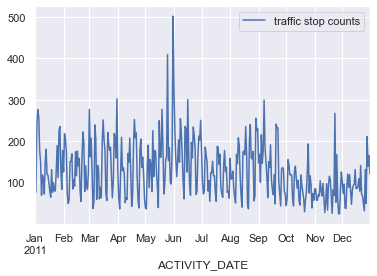

In [35]:
traffic_2011 = date_df['2011']
traffic_2011.plot()
plt.show()

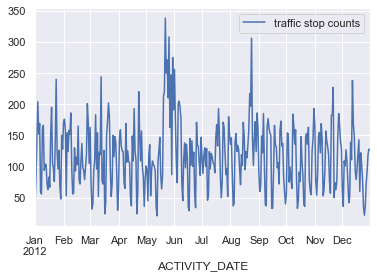

In [36]:
traffic_2012 = date_df['2012']
traffic_2012.plot()
plt.show()

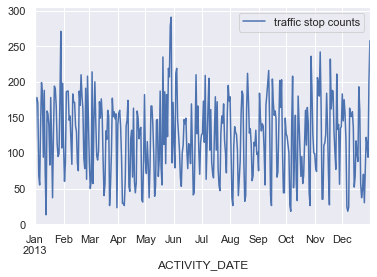

In [37]:
traffic_2013 = date_df['2013']
traffic_2013.plot()
plt.show()

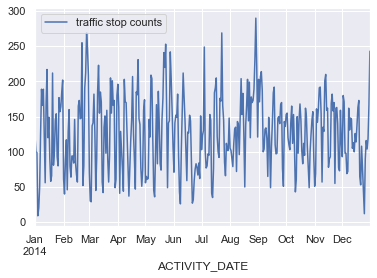

In [38]:
traffic_2014 = date_df['2014']
traffic_2014.plot()
plt.show()

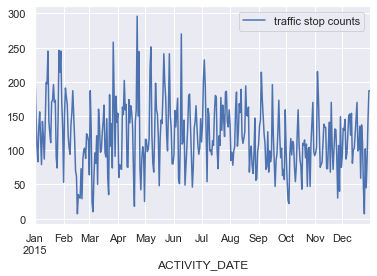

In [39]:
traffic_2015 = date_df['2015']
traffic_2015.plot()
plt.show()

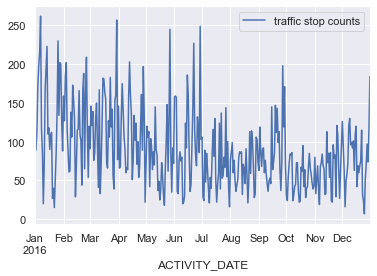

In [40]:
traffic_2016 = date_df['2016']
traffic_2016.plot()
plt.show()

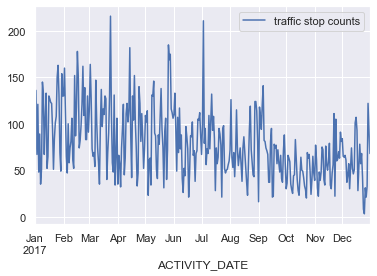

In [41]:
traffic_2017 = date_df['2017']
traffic_2017.plot()
plt.show()

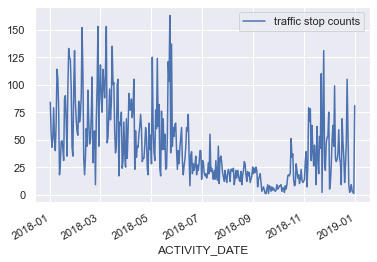

In [42]:
traffic_2018 = date_df['2018']
traffic_2018.plot(grid=True)
plt.show()

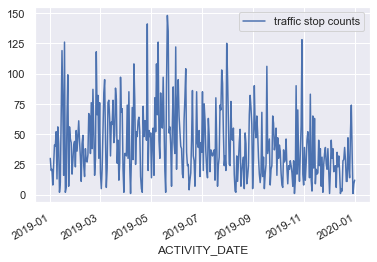

In [43]:
traffic_2019 = date_df['2019']
traffic_2019.plot()
plt.show()

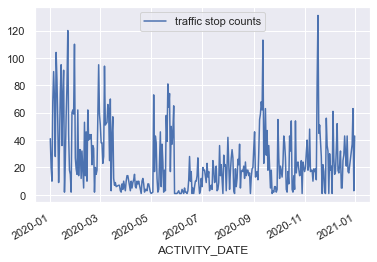

In [44]:
traffic_2020 = date_df['2020']
traffic_2020.plot()
plt.show()

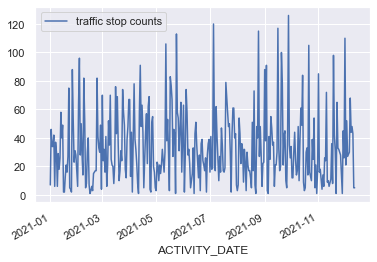

In [45]:
traffic_2021 = date_df['2021']
traffic_2021.plot()
plt.show()

In [46]:
# traffic_M = date_df.resample(rule='M')
# traffic_M.plot()
# plt.show()

In [47]:
# LMPD[['TYPE_OF_STOP','ACTIVITY RESULTS',
#        'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE',
#        'ACTIVITY_TIME','ACTIVITY_DIVISION','ACTIVITY_DATE',
#        'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
#        'NUMBER OF PASSENGERS', 'WAS_VEHCILE_SEARCHED']]

In [48]:
offc_race = 100*LMPDTS['OFFICER_RACE'].value_counts(normalize=True).to_frame('RacePercentage')
offc_race

,RacePercentage
WHITE,77.618660
BLACK,20.519682
ASIAN,1.191215
HISPANIC,0.642735
UNKNOWN,0.027708


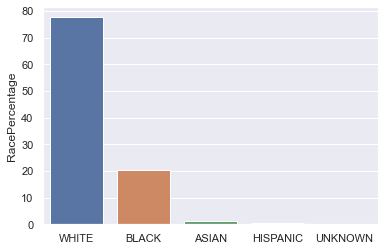

In [49]:
sns.barplot(x =offc_race.index, y='RacePercentage', data=offc_race);

In [50]:
LMPDTS['DRIVER_RACE'].value_counts(normalize=True).to_frame()

,DRIVER_RACE
WHITE,0.683452
BLACK,0.263268
HISPANIC,0.040070
ASIAN,0.010119
MIDDLE EASTERN DESCENT,0.001203
ASIAN/PACIFIC ISLANDER,0.000774
AMERICAN INDIAN,0.000654
INDIAN/INDIA/BURMESE,0.000424
ALASKAN NATIVE,0.000017
UNKNOWN,0.000014


In [51]:
crime_LMPD = pd.read_csv('C:\\Users\\14322\\Desktop\\Crime_data_loui.csv',low_memory=False )

In [52]:
crime_LMPD.head()

,DATE_OCCURED,LMPD_DIVISION
0,1/1/2009 0:00,1ST DIVISION
1,1/1/2009 0:00,4TH DIVISION
2,1/1/2009 0:00,6TH DIVISION
3,1/1/2009 0:00,4TH DIVISION
4,1/1/2009 0:00,METRO LOUISVILLE


In [53]:
crime_LMPD.shape

(1021056, 2)

In [54]:
crime_LMPD.isnull().sum()

DATE_OCCURED        0
LMPD_DIVISION    6324
dtype: int64

In [55]:
crime_LMPD = crime_LMPD.dropna(how='any')

In [56]:
crime_LMPD['LMPD_DIVISION'].value_counts()

331                 43777
423                 41252
412                 37928
111                 36370
223                 34948
123                 33031
112                 32798
315                 31930
625                 31675
323                 29293
424                 29181
612                 28474
411                 26282
736                 25572
211                 24655
613                 22790
322                 22721
724                 22015
735                 21743
512                 20352
723                 19745
624                 17516
436                 17182
135                 17166
225                 16721
815                 16596
824                 16176
521                 15768
236                 15429
234                 15174
435                 15081
4TH DIVISION        14944
212                 14766
811                 13804
334                 13790
316                 13408
812                 12938
611                 11952
METRO       

In [57]:
crime_LMPD.index = pd.to_datetime(crime_LMPD['DATE_OCCURED'])

In [58]:
crime_df = crime_LMPD.copy()

In [59]:
crime_dates = crime_df[['LMPD_DIVISION']].groupby(['DATE_OCCURED']).size().to_frame('crime_counts')

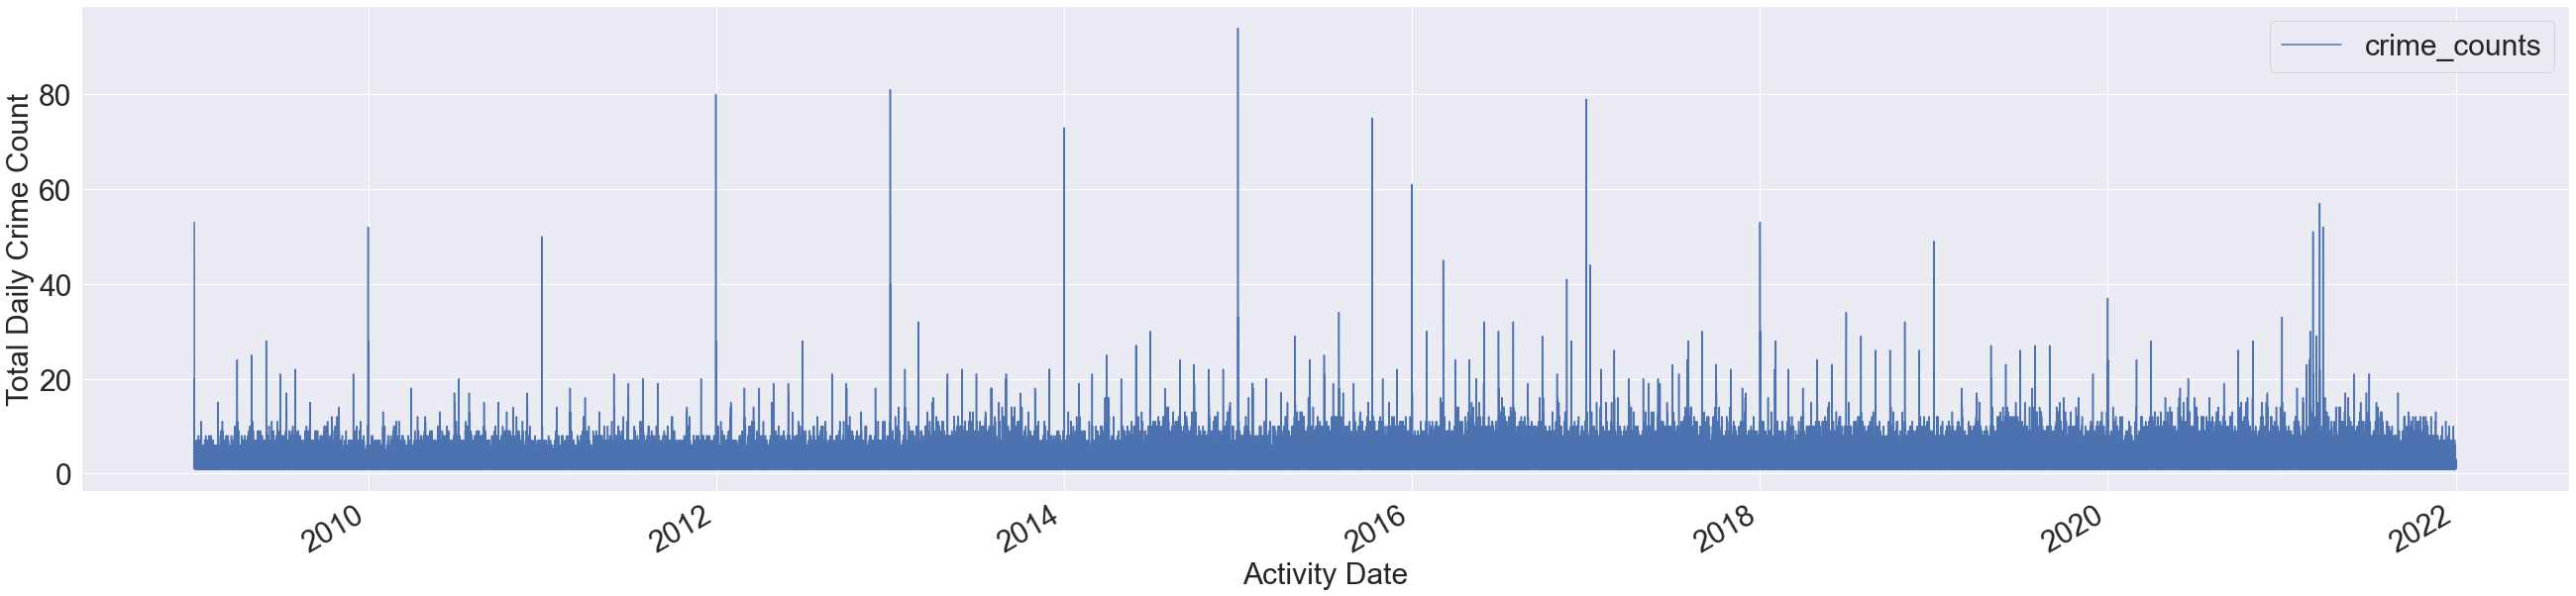

In [60]:
crime_dates.plot(figsize=(45,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Activity Date', fontsize=30)
plt.ylabel('Total Daily Crime Count', fontsize=30)
plt.legend(loc='best', fontsize=30)
plt.show()

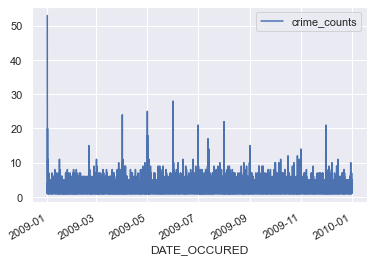

In [61]:
crime_2009 = crime_dates['2009']
crime_2009.plot()
plt.show()

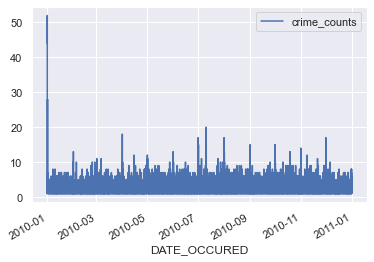

In [62]:
crime_2010 = crime_dates['2010']
crime_2010.plot()
plt.show()

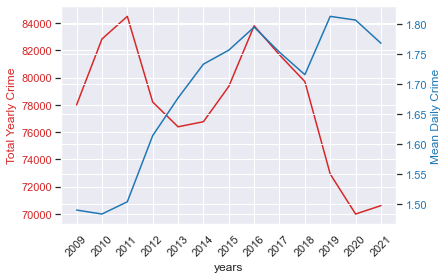

In [65]:
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
cmn = {}
cmian = {}
csum = {}
for y in years:
    ALLcmean = crime_dates[y].mean()
    ALLcmedian = crime_dates[y].median()
    ALLcsum = crime_dates[y].sum()
    
    cmn[y] = ALLcmean
    cmian[y] = ALLcmedian 
    csum[y] = ALLcsum
    
ALLcmedian = pd.DataFrame(cmian).T
ALLcmean = pd.DataFrame(cmn).T
ALLcsum = pd.DataFrame(csum).T

# mn = sns.lineplot(data=ALLcmean, palette = ['r'],legend =False,markers=True)
# #mn = sns.lineplot(data=ALLcmedian,legend=False)
# mn = sns.lineplot(data=ALLsum, palette = ['g'],legend =False,markers=True)

# mn.set_xlabel("Years", fontsize = 10)
# mn.set_ylabel("Traffic Stops", fontsize = 10);
# plt.legend( labels=['Mean', 'Total'])
# plt.xticks(rotation=45);

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('Total Yearly Crime', color=color)
ax1.plot(ALLcsum.index, ALLcsum['crime_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Daily Crime', color=color)  
ax2.plot(ALLcmean.index, ALLcmean['crime_counts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  

plt.show()

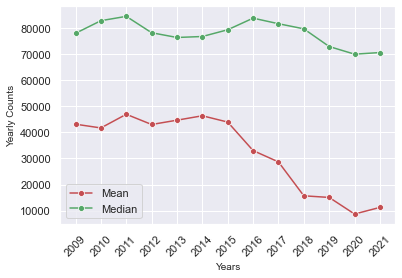

In [64]:
final = sns.lineplot(data=ALLtssum, palette = ['r'],legend =False,markers=True)
final = sns.lineplot(data=ALLcsum, palette = ['g'],legend =False,markers=True)


final.set_xlabel("Years", fontsize = 10)
final.set_ylabel("Yearly Counts", fontsize = 10);
plt.legend( labels=['Mean', 'Median'])
plt.xticks(rotation=45);